<a href="https://colab.research.google.com/github/kbharath21/iiith/blob/main/AIML_Module_2_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 2: Appreciating, Interpreting and Visualizing Data
Lab 1: Basic Plots

In [1]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [4]:
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [7]:
X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

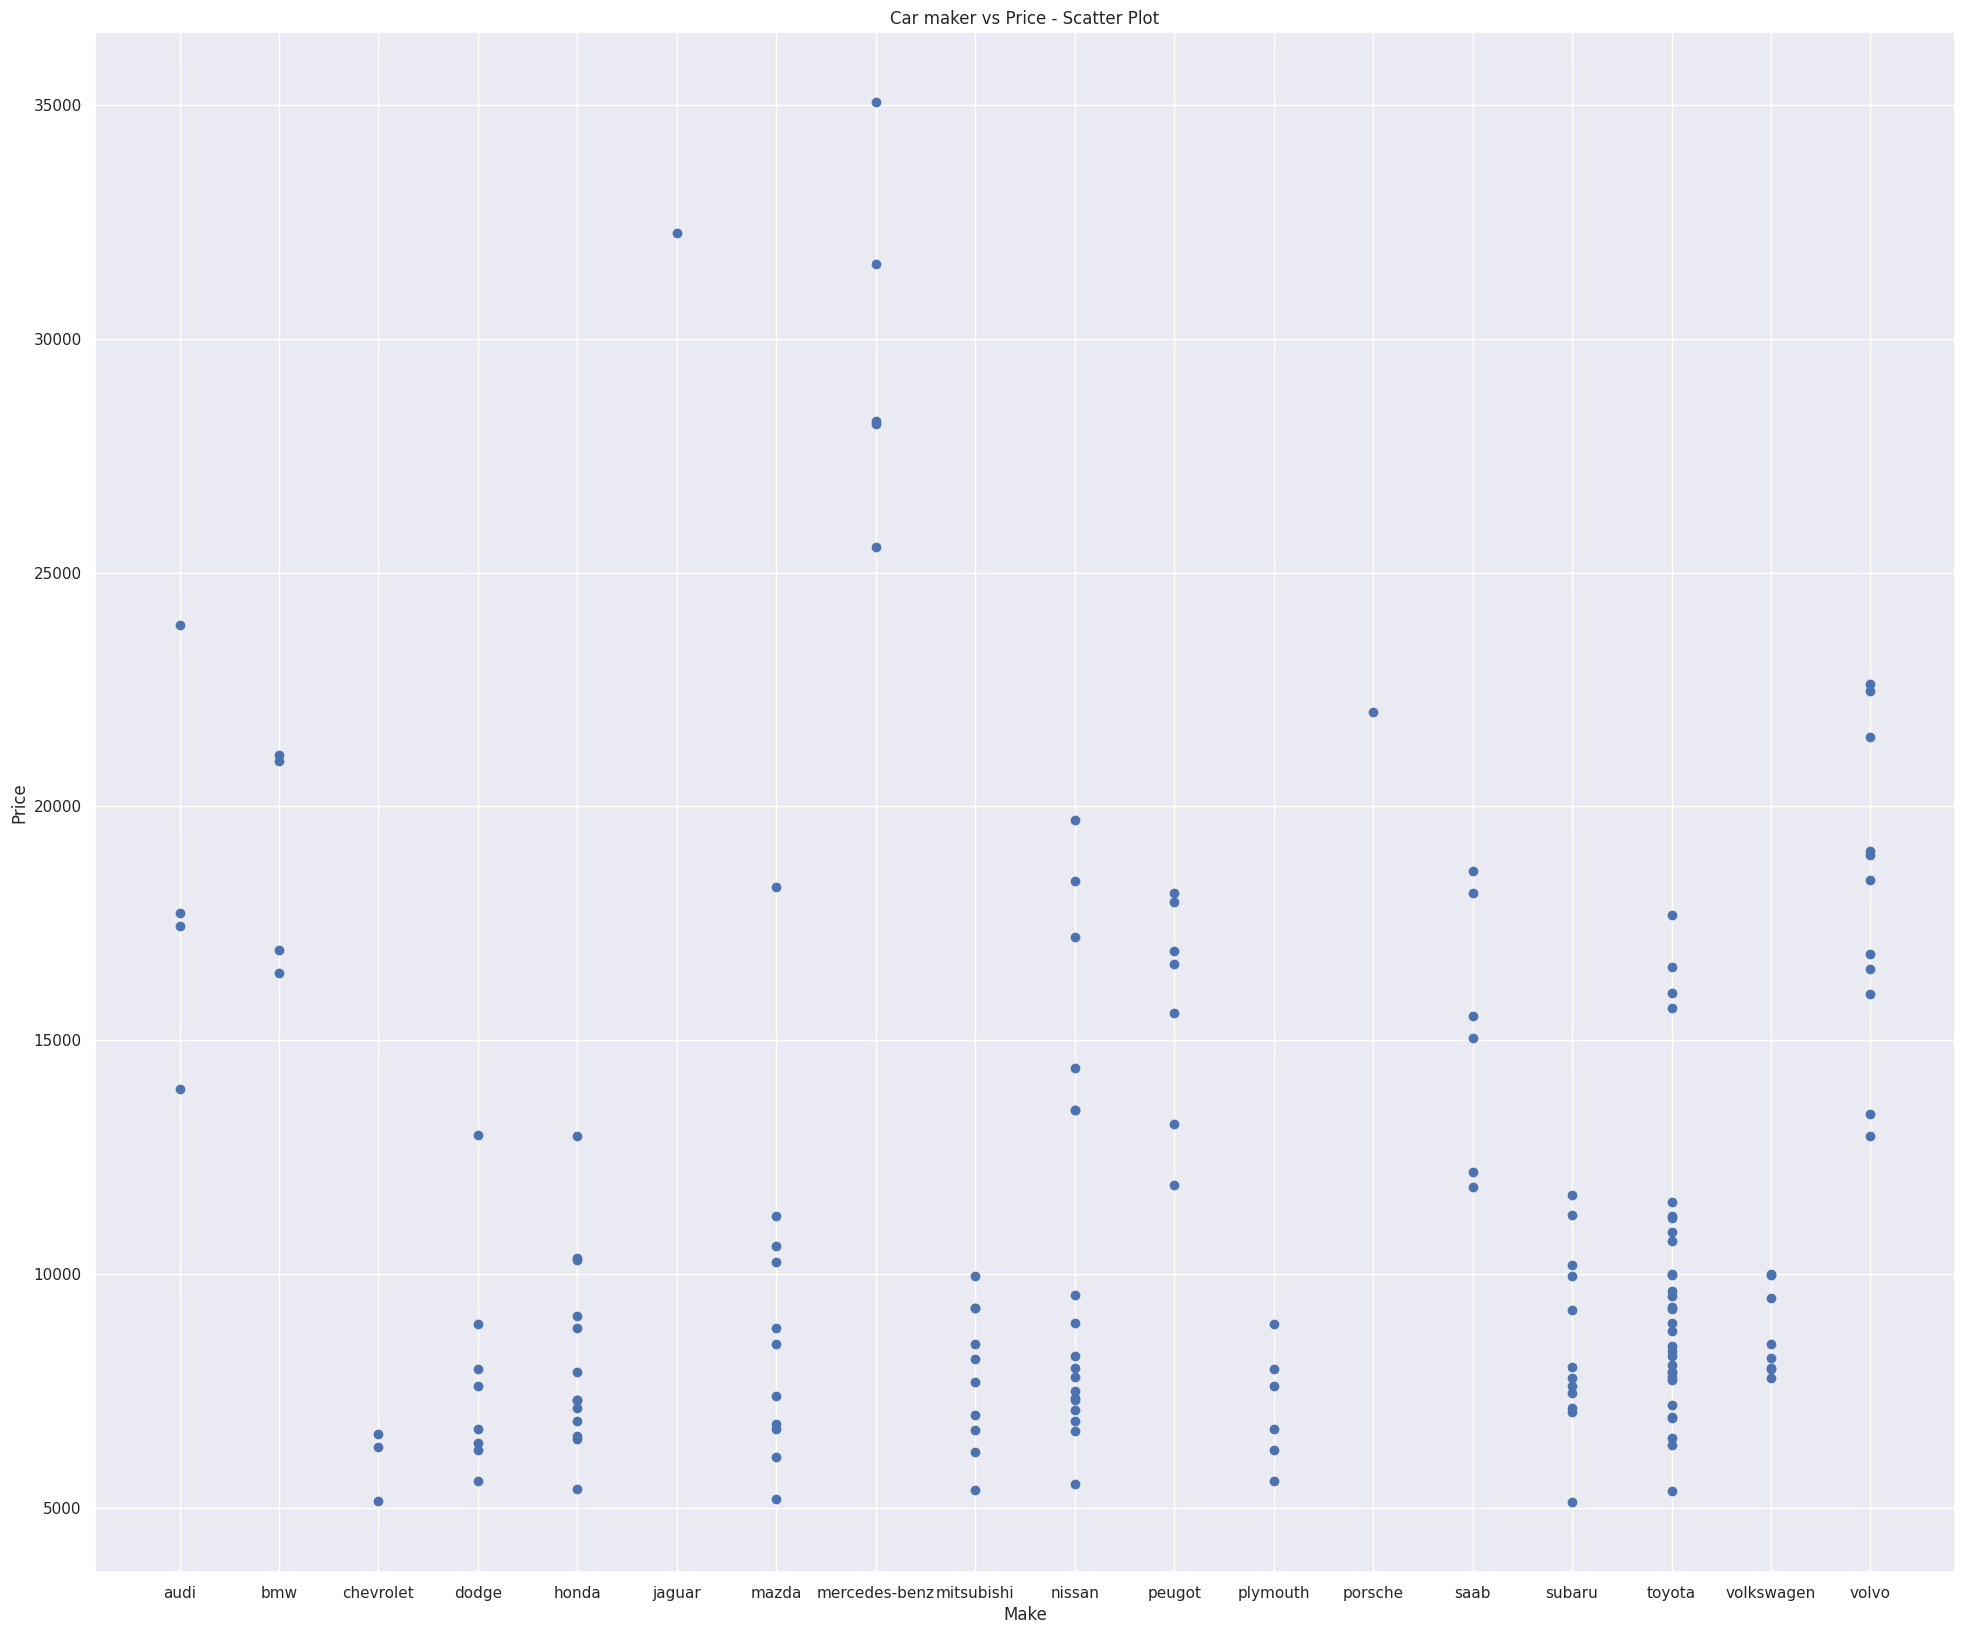

In [19]:
plt.figure(figsize = (24, 20))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

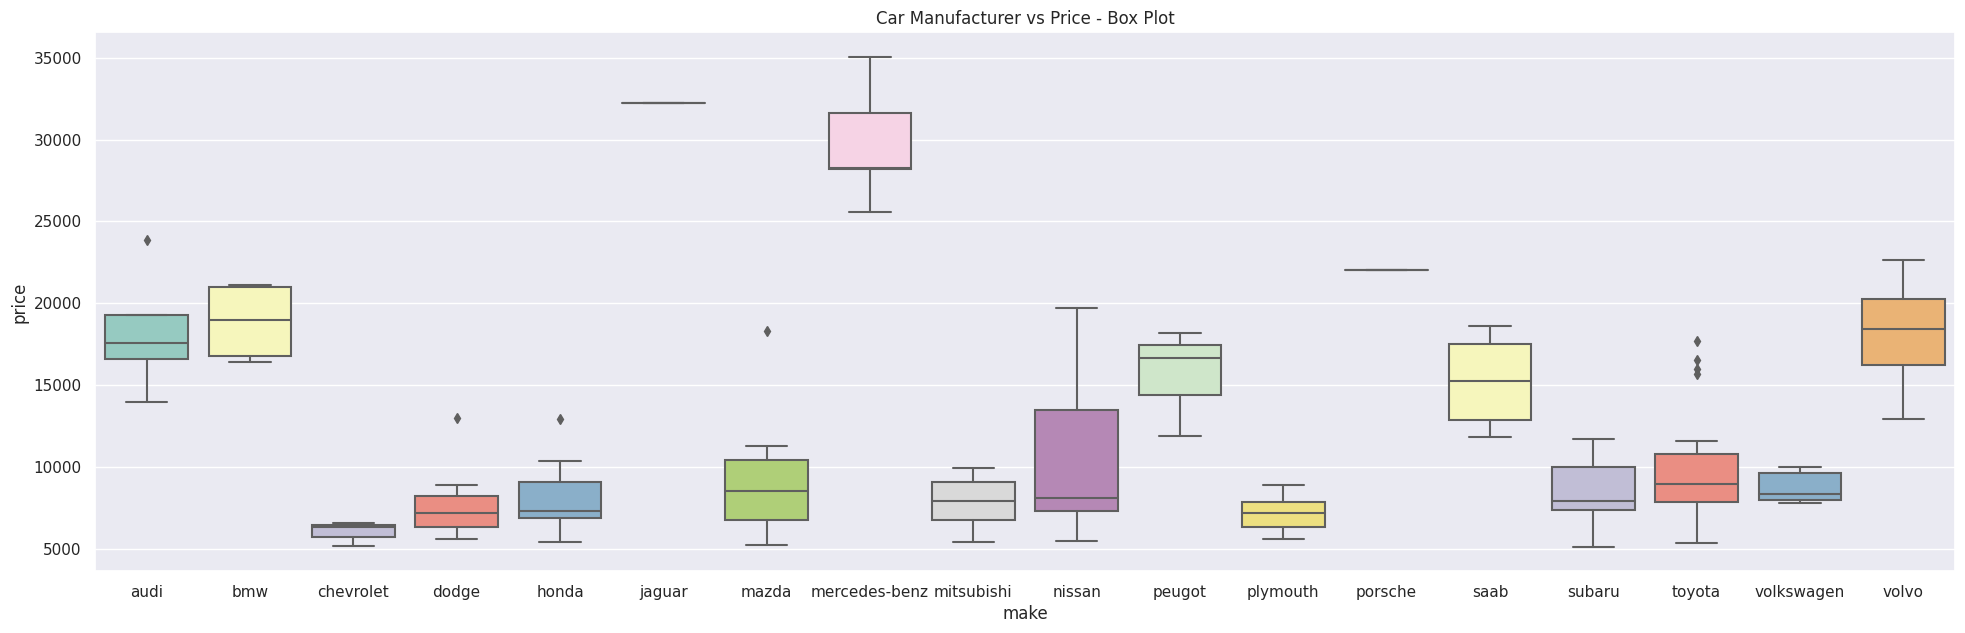

In [9]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

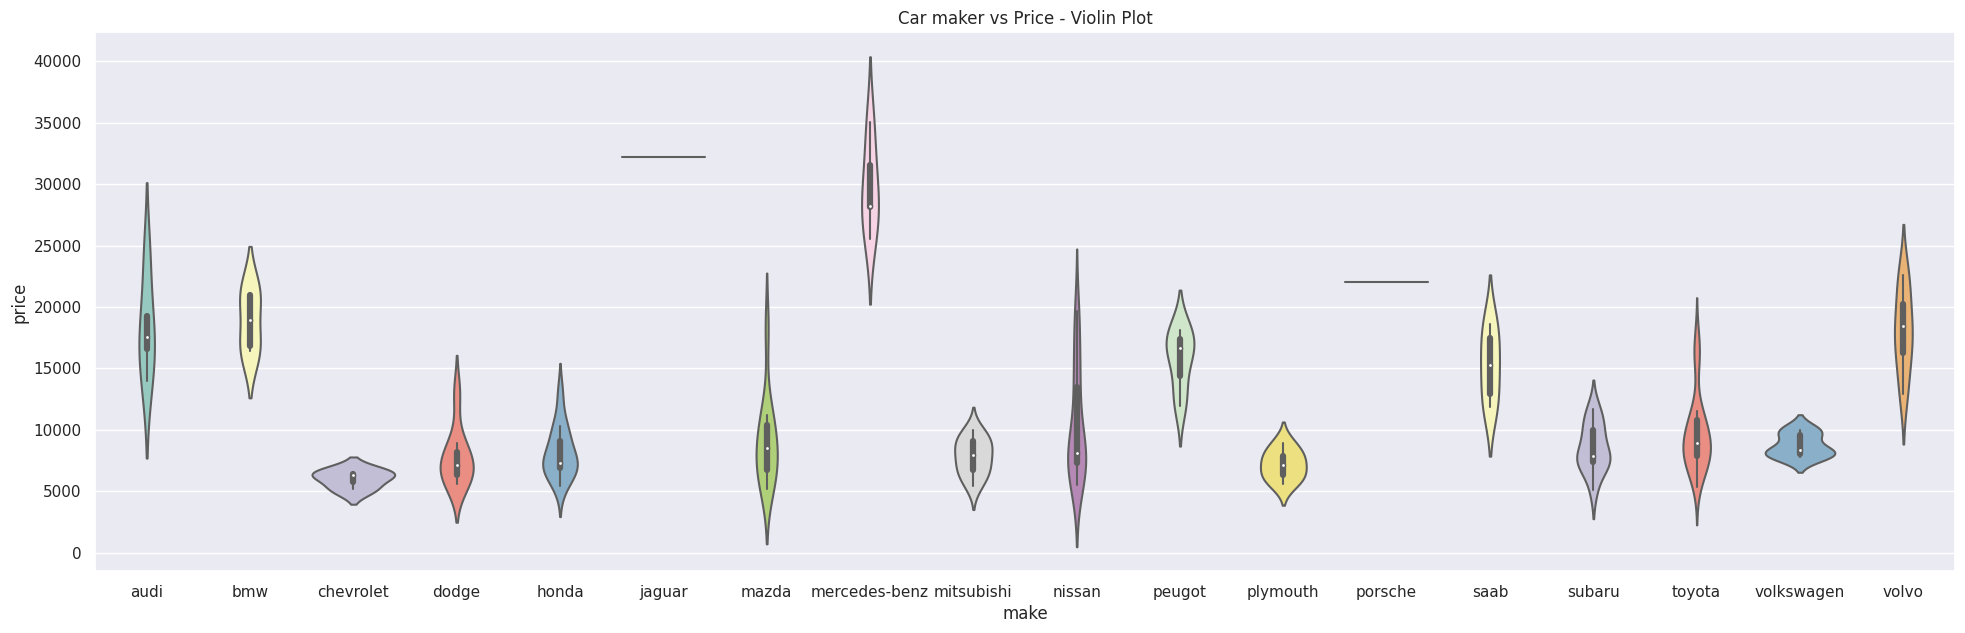

In [10]:
sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

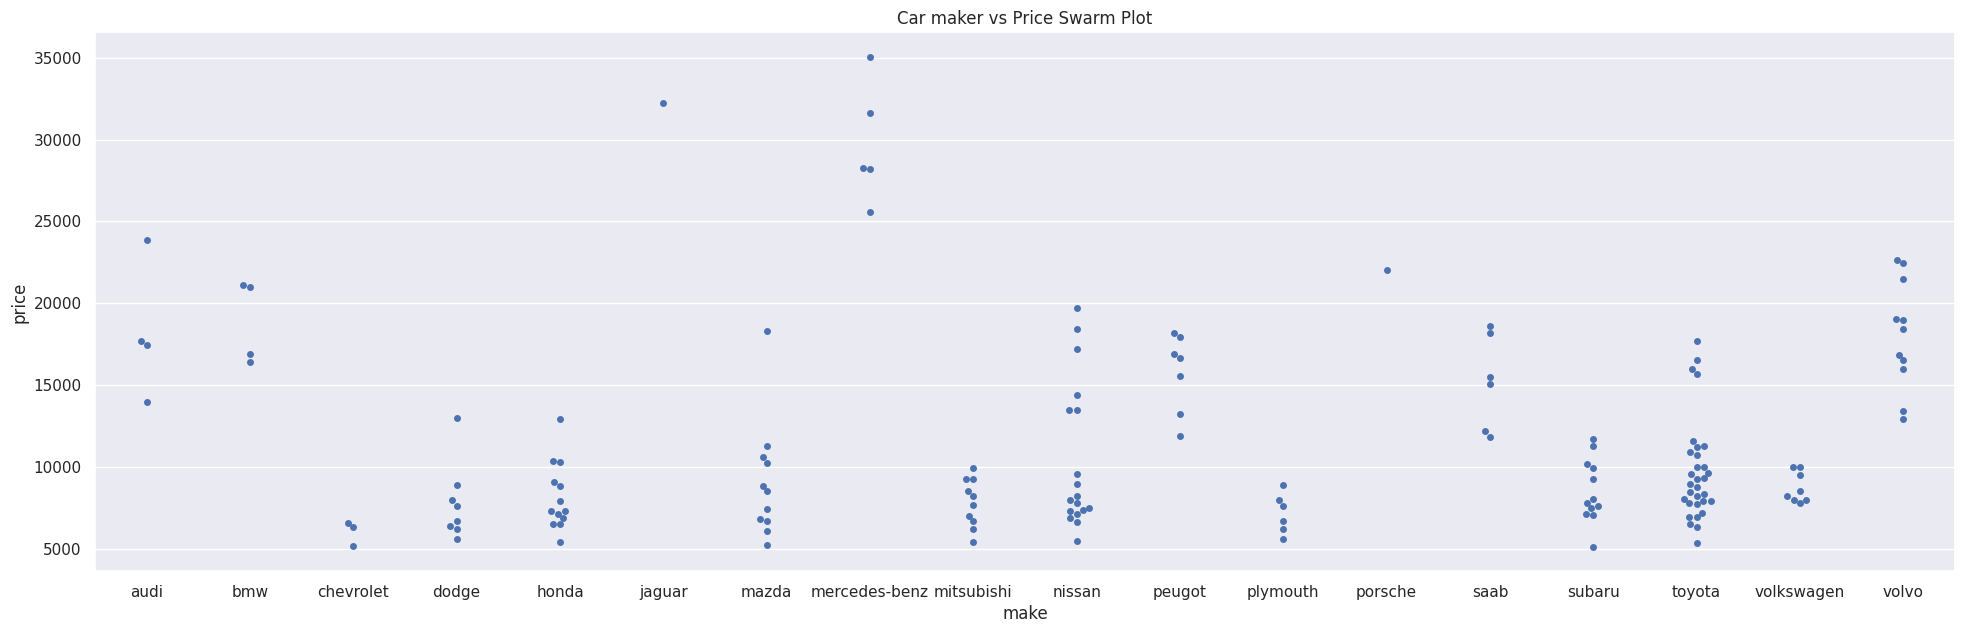

In [11]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

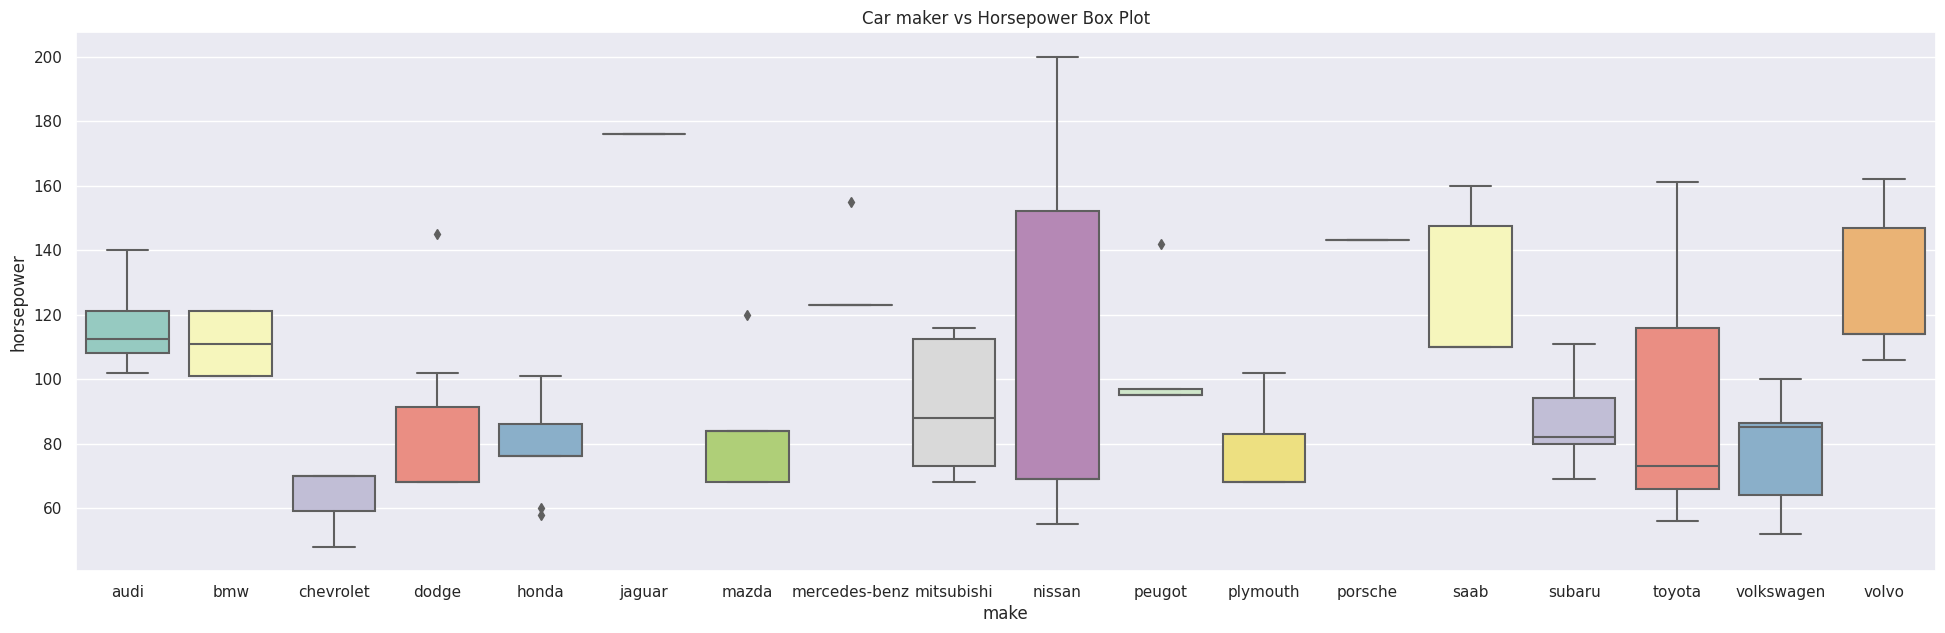

In [12]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')

<Axes: xlabel='horsepower', ylabel='price'>

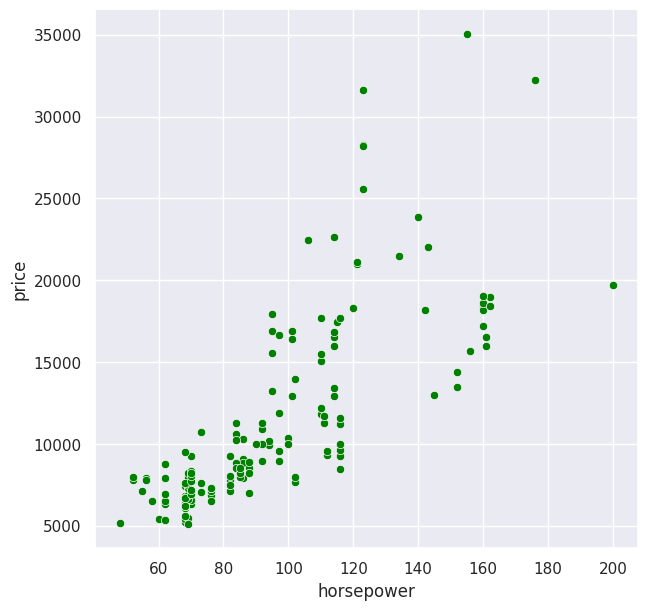

In [20]:
sns.set(rc={'figure.figsize':(7,7)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "green")

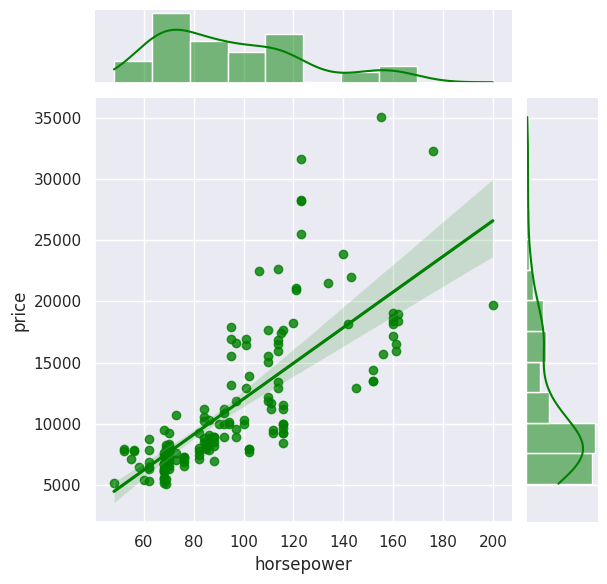

In [14]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'green')

Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".

<function matplotlib.pyplot.show(close=None, block=None)>

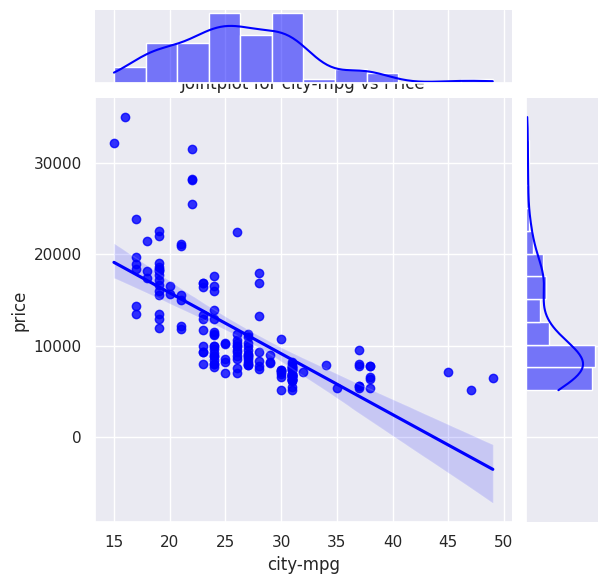

In [18]:
feature = "city-mpg"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'blue')
plt.xlabel(feature)
plt.ylabel("price")
plt.title(f'Jointplot for {feature} vs Price')
plt.show

Question: Interpret the plot below. List all the interpretations point by point using the plot below.
Some pointers:

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?


Answer:

 convertible are the costliest followed by sedans ,wagon, hatchback, hardtype. here somehow the iqr(inter quartile range) value is higher for sedan showing the higher ranges of prices for sedan than the convertible.

2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?


Answer:

the interquartile range for sedans is higher than the iqr for other body types, which suggests that there is a wider range of prices for sedans.
the iqr provides a measure of the spread of data and it can help us identify outliers and makes us understand better about the data .


3) Do you think the body-style of a car can be a good predictor for its price?


Answer:

body style of a car can be a good predictor of its price but its not the only factor. the box plot shows that there are differences in price between the different body types.
however other factors such as model , demand , features , performance and maintainance prizes play role.




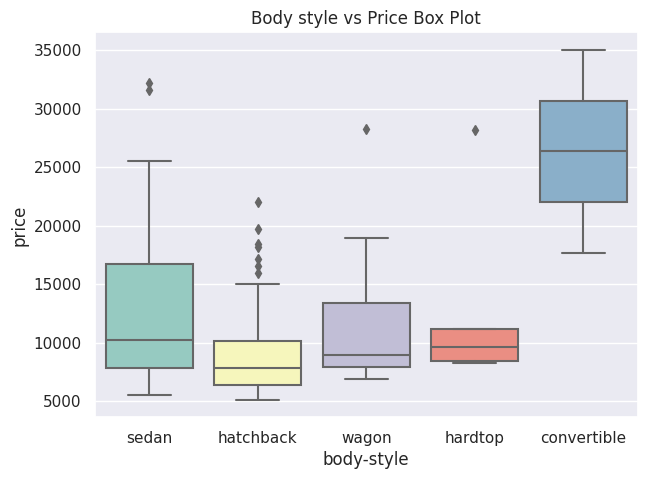